![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el archivo

In [157]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
print(df.shape)
df.head()  # vemos los 5 primeros datos del dataframe

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Verificamos los tipos de datos de las variables y si existen datos nulos.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

La variable objetivo es fetal_health y las que usaremos para clasificar van a ser las demás que están presentes en el dataset.

In [159]:
X = df.iloc[:, 0: -1].values #para clasificar
Y = df.iloc[:, -1].values #objetivo

Analizamos la correlación entre las variables para clasificar

<Axes: >

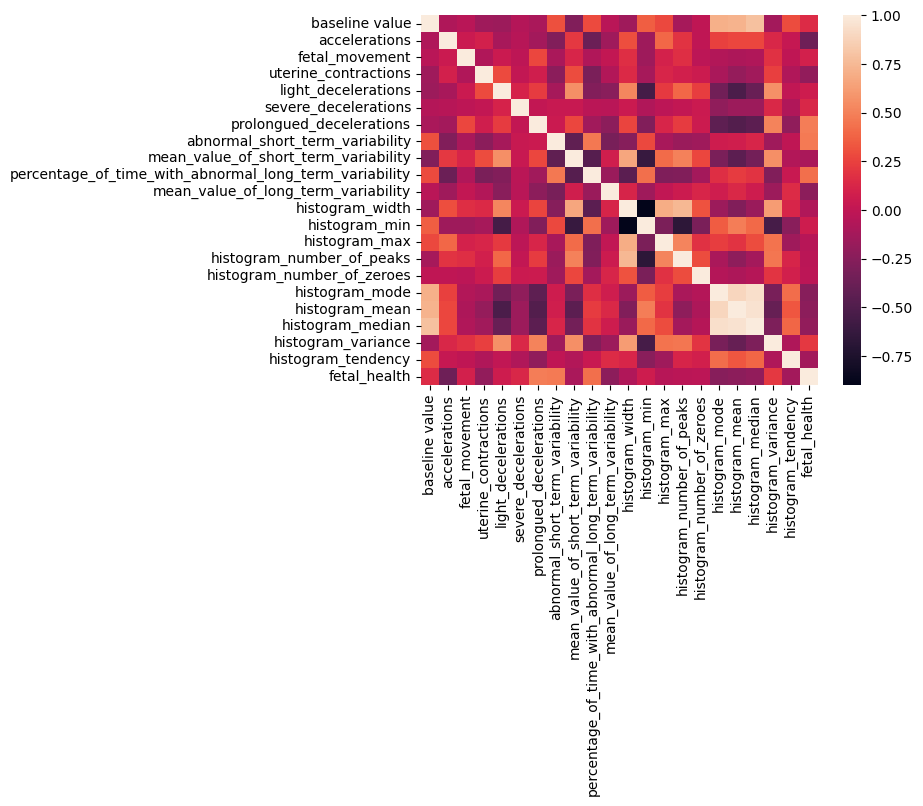

In [160]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)

Planteamos que los features que tengan una correlación entre sí de 0.9 sean reducidos para no generar redundancia.

In [161]:
columns = np.full((correlation_matrix.shape[0], ), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,4.0,1.0,2.0


Verificamos la distribución de los datos

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

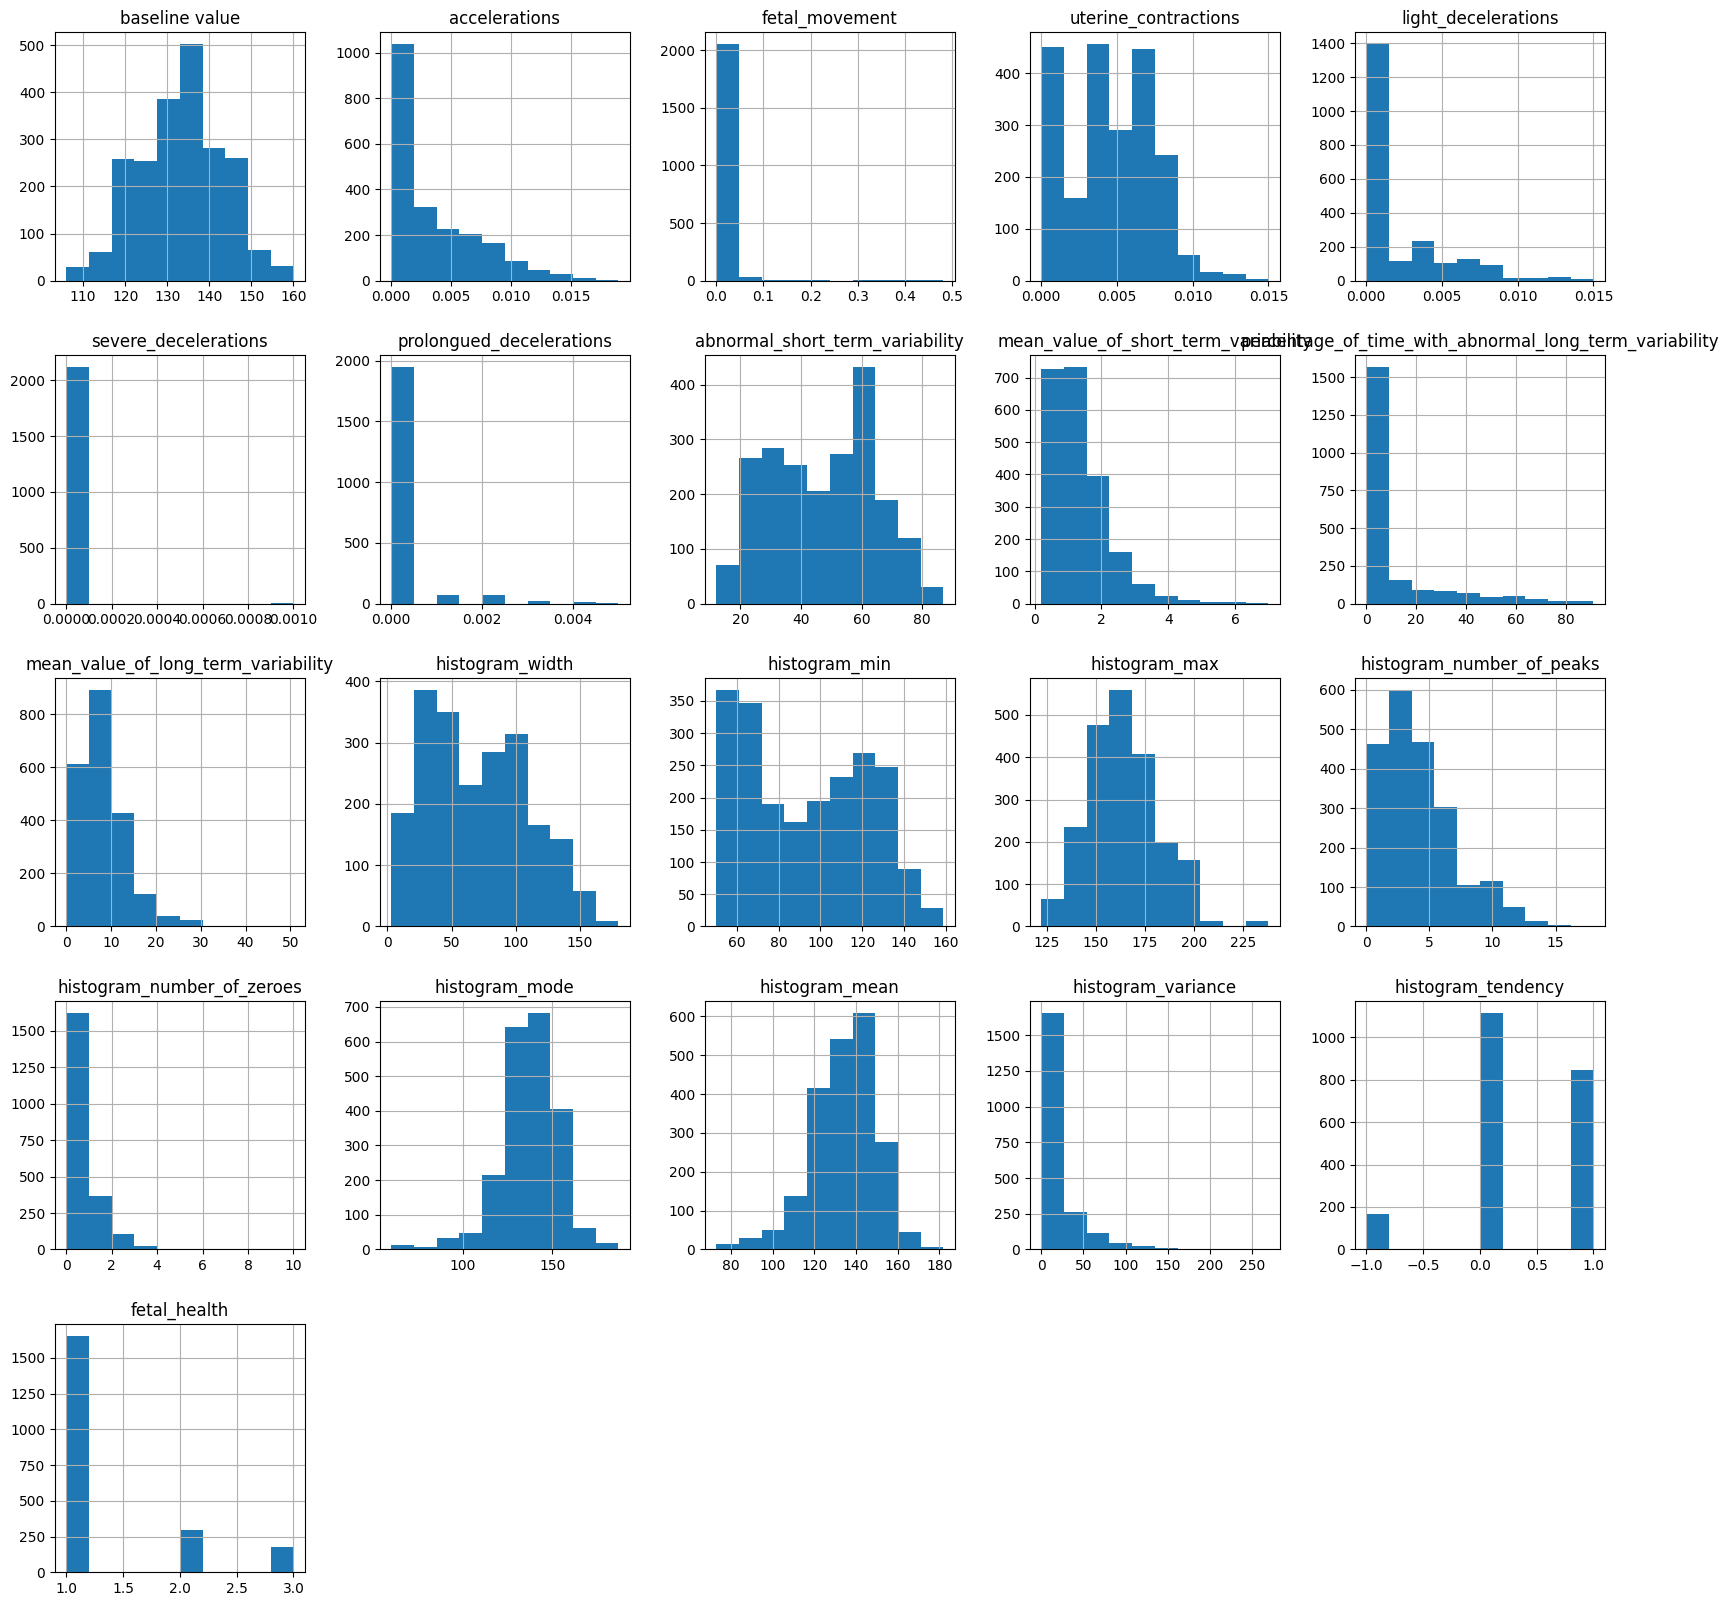

In [162]:
df.hist(figsize=(20, 20))

Visualizamos los diagramas de caja y bigotes para ver los outliers

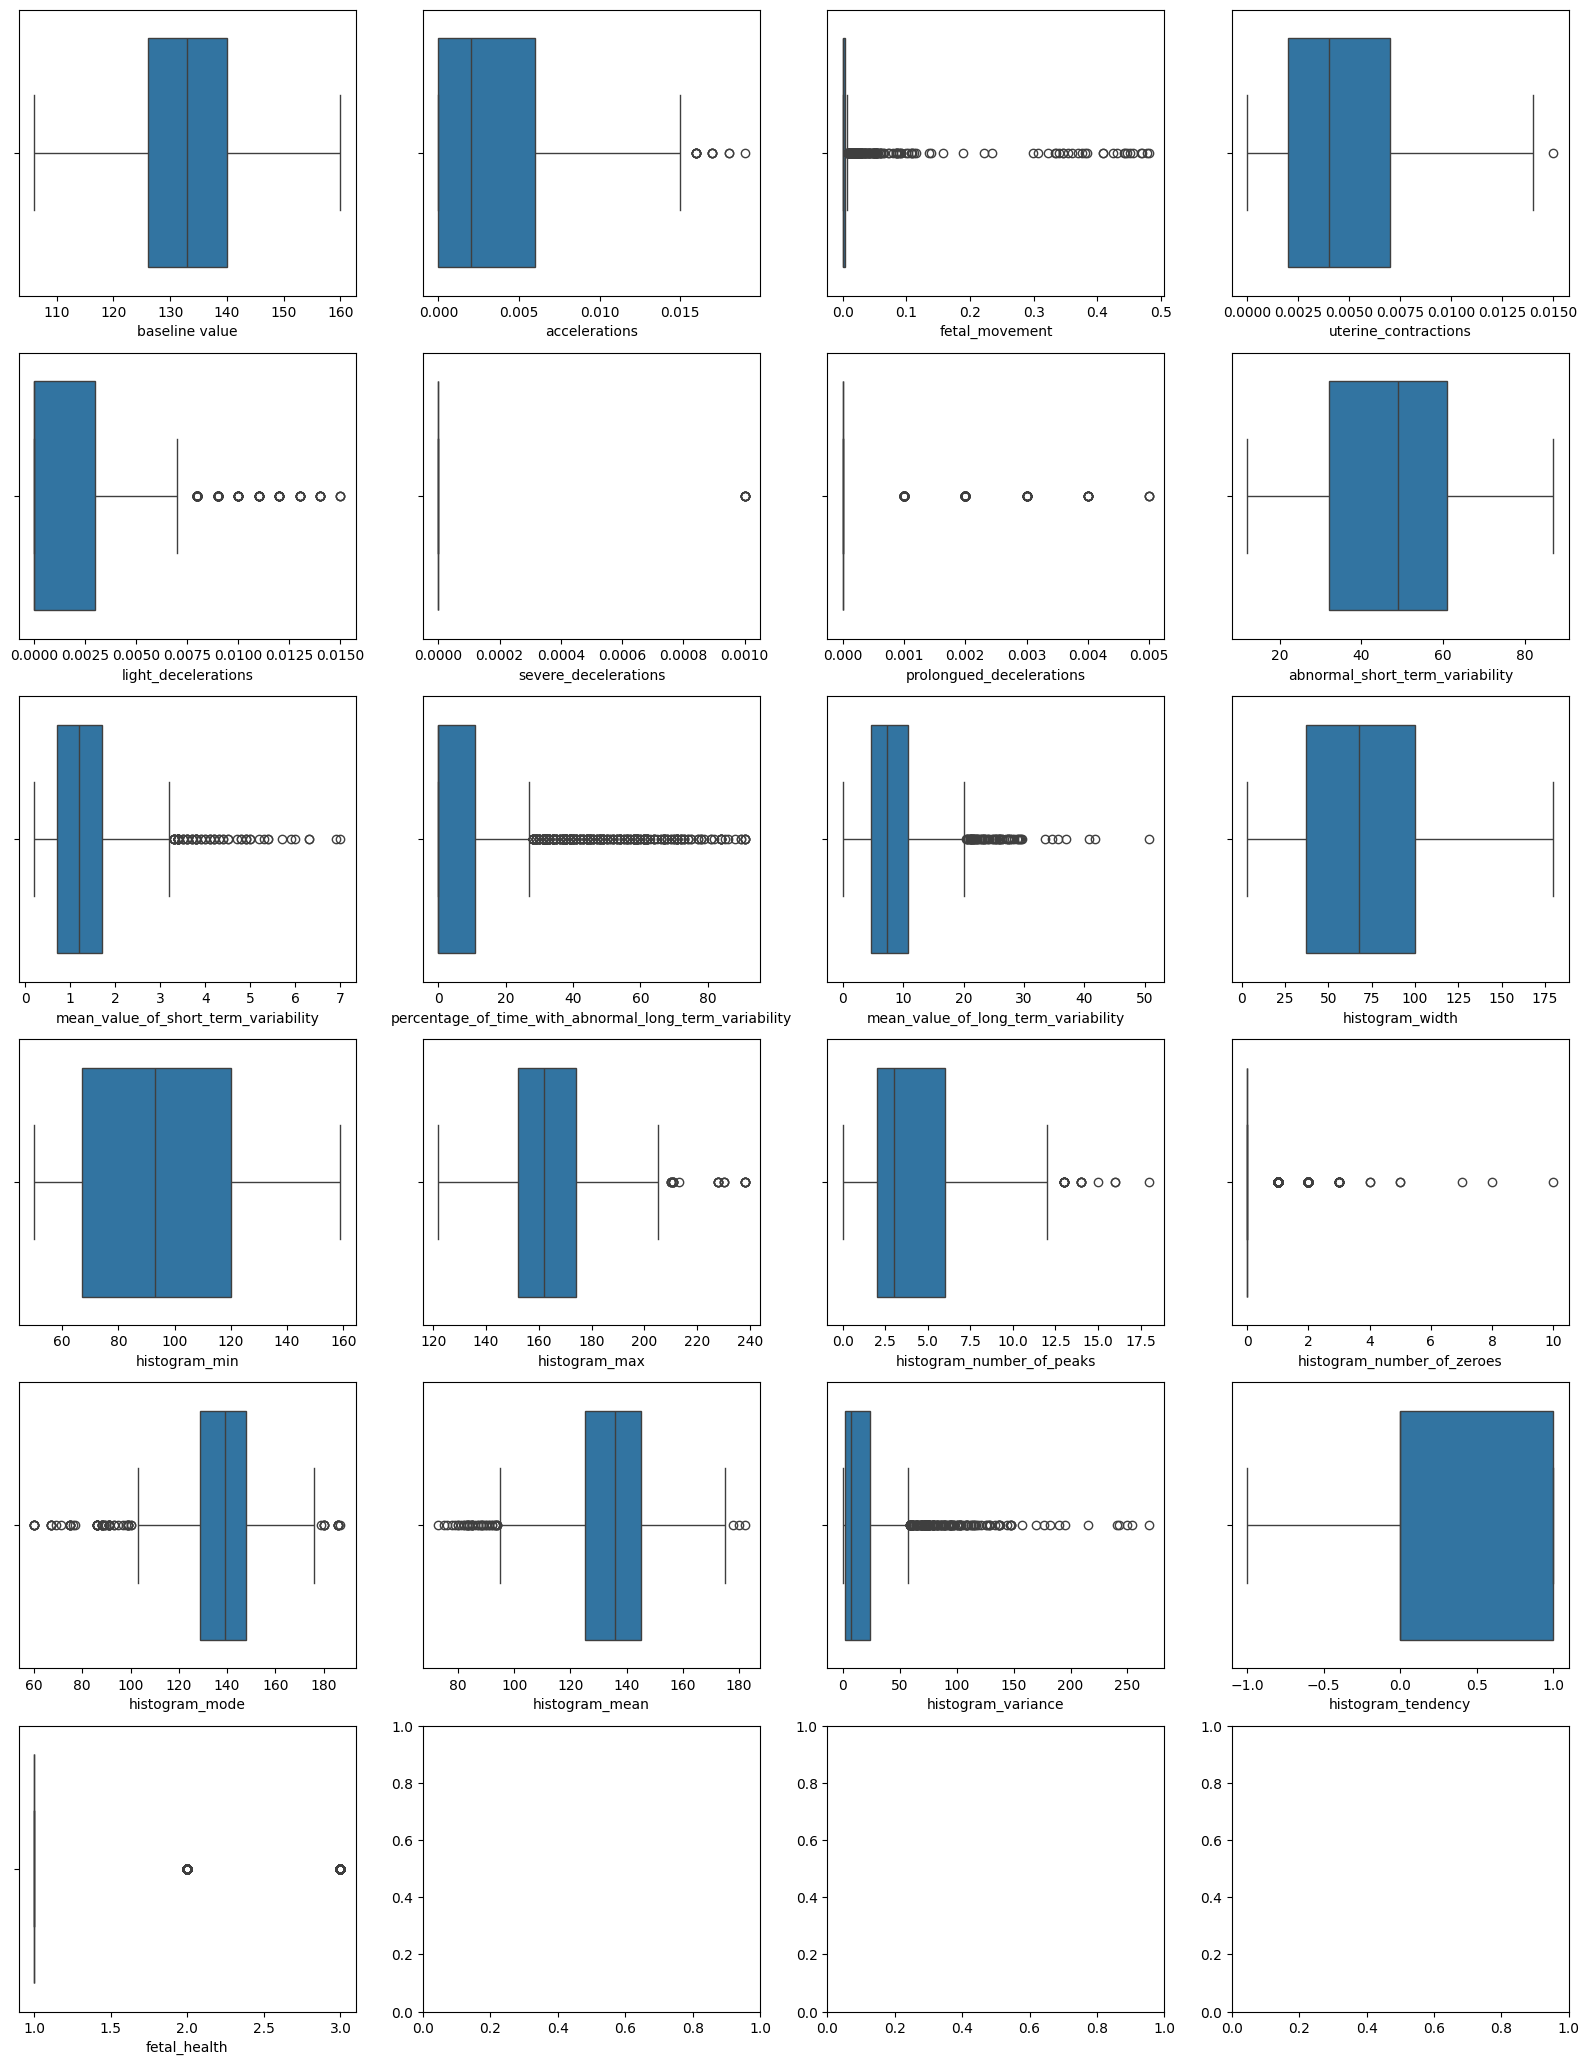

In [163]:
fig, ax = plt.subplots(6, 4, figsize=(20, 26))
for i, feature in enumerate(df):
  sns.boxplot(x=df[feature], ax=ax[i//4, i%4])

A partir de las gráficas anteriores, vamos a eliminar las siguientes columnas dado que no aportan mucha información al modelo o tiene una cantidad muy grande de outlier: severe_decelerations, fetal_movement, percentage_of_time_with_abnormal_long_term_variability, mean_value_of_short_term_variability y mean_value_of_long_term_variability

In [164]:
print(df.columns)
df = df.drop(columns=['severe_decelerations','fetal_movement','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_short_term_variability','mean_value_of_long_term_variability'])
print(df.columns)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_variance', 'histogram_tendency', 'fetal_health'],
      dtype='object')
Index(['baseline value', 'accelerations', 'uterine_contractions',
       'light_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability', 'histogram_width', 'histogram_min',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_variance', 'histogram_tendency', 'fe

Machine Learning

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [166]:
y = df['fetal_health']
X = df.drop(columns=["fetal_health"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
clf = RandomForestClassifier(max_depth=3,random_state=0) #max_depth=2,

In [168]:
# Realizar validación cruzada
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.88235294 0.86764706 0.83529412 0.84117647 0.87941176]
Mean cross-validation score: 0.8611764705882354


In [169]:
clf.fit(X, y)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Resultados Random Forest")
print("Accuracy:",accuracy)
print("Classification Report:")
print(classification_report(y_test,predictions))

Resultados Random Forest
Accuracy: 0.8544600938967136
Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.99      0.92       333
         2.0       0.75      0.28      0.41        64
         3.0       1.00      0.52      0.68        29

    accuracy                           0.85       426
   macro avg       0.87      0.60      0.67       426
weighted avg       0.85      0.85      0.83       426



In [170]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [171]:
# Realizar validación cruzada
cv_scores = cross_val_score(clf2, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.94117647 0.90294118 0.89411765 0.90882353 0.94117647]
Mean cross-validation score: 0.9176470588235294


In [172]:
clf2.fit(X, y)
predictions = clf2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Resultados Gradient Boosting")
print("Accuracy:",accuracy)
print("Classification Report:")
print(classification_report(y_test,predictions))

Resultados Gradient Boosting
Accuracy: 0.9225352112676056
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       333
         2.0       0.84      0.66      0.74        64
         3.0       0.83      0.83      0.83        29

    accuracy                           0.92       426
   macro avg       0.87      0.82      0.84       426
weighted avg       0.92      0.92      0.92       426



In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [174]:
# Realizar validación cruzada
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.88823529 0.90588235 0.89411765 0.90882353 0.91764706]
Mean cross-validation score: 0.9029411764705882


In [175]:
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Resultados KNN")
print("Accuracy:",accuracy)
print("Classification Report:")
print(classification_report(y_test,predictions))

Resultados KNN
Accuracy: 0.8943661971830986
Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       333
         2.0       0.74      0.62      0.68        64
         3.0       0.77      0.69      0.73        29

    accuracy                           0.89       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.89      0.89       426



Observaciones

Para mejorar los resultados se pueden realizar imputaciones en ciertos atributos, para ello debemos analizar sus valores max o min.